In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 

In [2]:
crimes=pd.read_csv("Crimes.csv")
crimes.head()

,CASE#,DATE OF OCCURRENCE,BLOCK,IUCR,PRIMARY DESCRIPTION,SECONDARY DESCRIPTION,LOCATION DESCRIPTION,ARREST,DOMESTIC,BEAT,WARD,FBI CD,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION
0,JF156487,12/01/2021 12:01:00 AM,056XX N SPAULDING AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,APARTMENT,N,N,1711,39.0,08A,NaN,NaN,NaN,NaN,NaN
1,JE462030,11/28/2021 02:00:00 PM,020XX N CLARK ST,0460,BATTERY,SIMPLE,APARTMENT,N,N,1814,43.0,08B,1173852.0,1913957.0,41.919311,-87.636668,"(41.919311217, -87.636668238)"
2,JE413628,10/16/2021 04:00:00 AM,047XX S HAMLIN AVE,0820,THEFT,$500 AND UNDER,ALLEY,N,N,821,14.0,06,NaN,NaN,NaN,NaN,NaN
3,JF166915,03/07/2022 10:30:00 PM,032XX N NATOMA AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,RESIDENCE - GARAGE,N,N,1632,36.0,14,NaN,NaN,NaN,NaN,NaN
4,JF347411,07/31/2022 03:05:00 PM,003XX E RANDOLPH ST,0870,THEFT,POCKET-PICKING,PARK PROPERTY,N,N,114,42.0,06,NaN,NaN,NaN,NaN,NaN


In [3]:
print("Number of rows ",crimes.shape[0])
print("Number of Columns ",crimes.shape[1])

Number of rows  223774
Number of Columns  17


In [4]:
crimes.dtypes

CASE#                      object
DATE  OF OCCURRENCE        object
BLOCK                      object
 IUCR                      object
 PRIMARY DESCRIPTION       object
 SECONDARY DESCRIPTION     object
 LOCATION DESCRIPTION      object
ARREST                     object
DOMESTIC                   object
BEAT                        int64
WARD                      float64
FBI CD                     object
X COORDINATE              float64
Y COORDINATE              float64
LATITUDE                  float64
LONGITUDE                 float64
LOCATION                   object
dtype: object

In [5]:
crimes.rename(columns = {" IUCR":"IUCR",
 " PRIMARY DESCRIPTION":"PRIMARY DESCRIPTION",
 " SECONDARY DESCRIPTION":"SECONDARY DESCRIPTION",
 " LOCATION DESCRIPTION":"LOCATION DESCRIPTION"}, inplace = True)


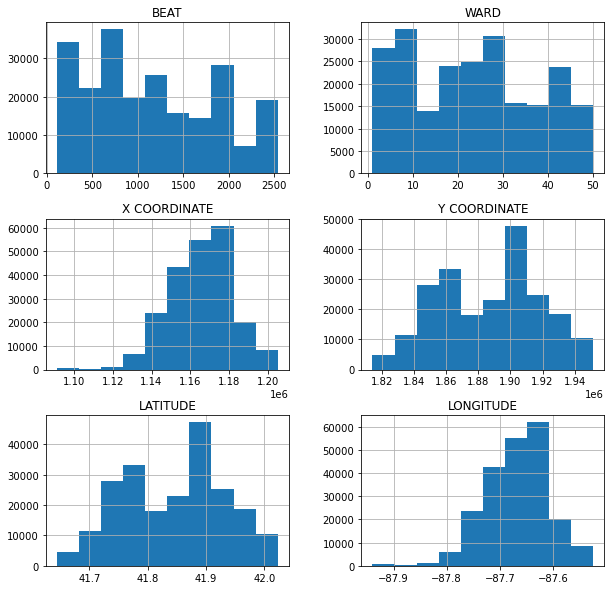

In [6]:
plt.rcParams["figure.figsize"] = (10,10)
crimes.hist()
plt.show()

In [7]:
crimes.describe()

,BEAT,WARD,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE
count,223774.000000,223764.000000,2.200430e+05,2.200430e+05,220043.000000,220043.000000
mean,1153.018103,23.335702,1.165445e+06,1.886897e+06,41.845223,-87.668368
std,707.543382,14.218504,1.635043e+04,3.174928e+04,0.087310,0.059527
min,111.000000,1.000000,1.091242e+06,1.813909e+06,41.644595,-87.939733
25%,533.000000,9.000000,1.154044e+06,1.859315e+06,41.769185,-87.709807
50%,1032.000000,24.000000,1.167319e+06,1.893064e+06,41.862218,-87.661178
75%,1731.000000,35.000000,1.176829e+06,1.909856e+06,41.908431,-87.626513
max,2535.000000,50.000000,1.205119e+06,1.951499e+06,42.022548,-87.524529


In [8]:
crimes.isnull().sum()

CASE#                       0
DATE  OF OCCURRENCE         0
BLOCK                       0
IUCR                        0
PRIMARY DESCRIPTION         0
SECONDARY DESCRIPTION       0
LOCATION DESCRIPTION      668
ARREST                      0
DOMESTIC                    0
BEAT                        0
WARD                       10
FBI CD                      0
X COORDINATE             3731
Y COORDINATE             3731
LATITUDE                 3731
LONGITUDE                3731
LOCATION                 3731
dtype: int64

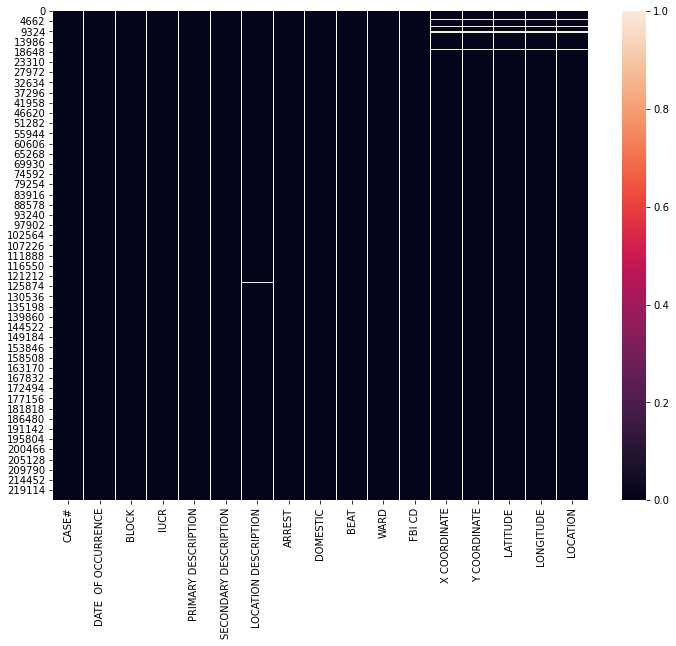

In [9]:
plt.figure(figsize=(12,9))
sns.heatmap(crimes.isna())
plt.show()

In [10]:
crimes.columns

Index(['CASE#', 'DATE  OF OCCURRENCE', 'BLOCK', 'IUCR', 'PRIMARY DESCRIPTION',
       'SECONDARY DESCRIPTION', 'LOCATION DESCRIPTION', 'ARREST', 'DOMESTIC',
       'BEAT', 'WARD', 'FBI CD', 'X COORDINATE', 'Y COORDINATE', 'LATITUDE',
       'LONGITUDE', 'LOCATION'],
      dtype='object')

In [11]:
crimes['DATE  OF OCCURRENCE'] = pd.to_datetime(crimes['DATE  OF OCCURRENCE'])

In [12]:
crimes.dtypes

CASE#                            object
DATE  OF OCCURRENCE      datetime64[ns]
BLOCK                            object
IUCR                             object
PRIMARY DESCRIPTION              object
SECONDARY DESCRIPTION            object
LOCATION DESCRIPTION             object
ARREST                           object
DOMESTIC                         object
BEAT                              int64
WARD                            float64
FBI CD                           object
X COORDINATE                    float64
Y COORDINATE                    float64
LATITUDE                        float64
LONGITUDE                       float64
LOCATION                         object
dtype: object

In [13]:
crimes['PRIMARY DESCRIPTION'].unique()

array(['OTHER OFFENSE', 'BATTERY', 'THEFT', 'CRIMINAL DAMAGE',
       'NARCOTICS', 'ROBBERY', 'DECEPTIVE PRACTICE', 'ASSAULT',
       'BURGLARY', 'WEAPONS VIOLATION', 'PUBLIC PEACE VIOLATION',
       'MOTOR VEHICLE THEFT', 'OFFENSE INVOLVING CHILDREN',
       'CRIMINAL SEXUAL ASSAULT', 'CRIMINAL TRESPASS', 'ARSON',
       'INTIMIDATION', 'INTERFERENCE WITH PUBLIC OFFICER', 'SEX OFFENSE',
       'OBSCENITY', 'LIQUOR LAW VIOLATION', 'STALKING',
       'CONCEALED CARRY LICENSE VIOLATION', 'GAMBLING', 'KIDNAPPING',
       'HOMICIDE', 'HUMAN TRAFFICKING', 'PROSTITUTION',
       'PUBLIC INDECENCY', 'NON-CRIMINAL', 'OTHER NARCOTIC VIOLATION'],
      dtype=object)

In [14]:
crimes['DATE  OF OCCURRENCE'].dt.year.value_counts()

2022    156474
2021     67300
Name: DATE  OF OCCURRENCE, dtype: int64

In [15]:
crimes=crimes[((crimes["PRIMARY DESCRIPTION"]  !=  'NON-CRIMINAL (SUBJECT SPECIFIED)') & 
               (crimes["PRIMARY DESCRIPTION"]  !=  'OTHER OFFENSE') &
               (crimes["PRIMARY DESCRIPTION"]  !=  'STALKING') &
               (crimes["PRIMARY DESCRIPTION"]  !=  'NON - CRIMINAL') &
               (crimes["PRIMARY DESCRIPTION"]  !=  'ARSON'))]

In [16]:
crimes

,CASE#,DATE OF OCCURRENCE,BLOCK,IUCR,PRIMARY DESCRIPTION,SECONDARY DESCRIPTION,LOCATION DESCRIPTION,ARREST,DOMESTIC,BEAT,WARD,FBI CD,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION
1,JE462030,2021-11-28 14:00:00,020XX N CLARK ST,0460,BATTERY,SIMPLE,APARTMENT,N,N,1814,43.0,08B,1173852.0,1913957.0,41.919311,-87.636668,"(41.919311217, -87.636668238)"
2,JE413628,2021-10-16 04:00:00,047XX S HAMLIN AVE,0820,THEFT,$500 AND UNDER,ALLEY,N,N,821,14.0,06,NaN,NaN,NaN,NaN,NaN
3,JF166915,2022-03-07 22:30:00,032XX N NATOMA AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,RESIDENCE - GARAGE,N,N,1632,36.0,14,NaN,NaN,NaN,NaN,NaN
4,JF347411,2022-07-31 15:05:00,003XX E RANDOLPH ST,0870,THEFT,POCKET-PICKING,PARK PROPERTY,N,N,114,42.0,06,NaN,NaN,NaN,NaN,NaN
5,JE413551,2021-10-16 03:20:00,036XX N TRIPP AVE,0810,THEFT,OVER $500,VEHICLE NON-COMMERCIAL,N,N,1731,45.0,06,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223769,JF344742,2022-08-04 23:00:00,061XX S ADA ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,Y,Y,713,16.0,08B,1168364.0,1864004.0,41.782356,-87.658275,"(41.782356328, -87.658274521)"
223770,JF177280,2022-03-17 15:00:00,082XX S CORNELL AVE,0530,ASSAULT,AGGRAVATED - OTHER DANGEROUS WEAPON,CHURCH / SYNAGOGUE / PLACE OF WORSHIP,N,N,411,8.0,04A,1188696.0,1850740.0,41.745497,-87.584156,"(41.745496565, -87.58415609)"
223771,JF314049,2022-07-11 21:15:00,058XX N WASHTENAW AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,N,N,2011,40.0,14,1157284.0,1938659.0,41.987448,-87.696867,"(41.987448212, -87.696867131)"
223772,JF196675,2022-04-02 21:30:00,078XX S EVANS AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,N,N,624,6.0,14,1182582.0,1853287.0,41.752630,-87.606480,"(41.752629696, -87.606479789)"


<AxesSubplot:>

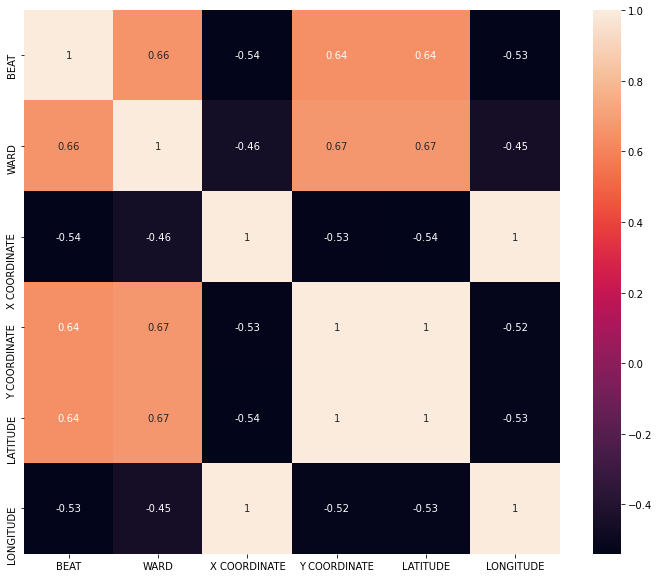

In [17]:
plt.figure(figsize=(12,10))
sns.heatmap(crimes.corr(),annot=True)

In [18]:
crimes.columns

Index(['CASE#', 'DATE  OF OCCURRENCE', 'BLOCK', 'IUCR', 'PRIMARY DESCRIPTION',
       'SECONDARY DESCRIPTION', 'LOCATION DESCRIPTION', 'ARREST', 'DOMESTIC',
       'BEAT', 'WARD', 'FBI CD', 'X COORDINATE', 'Y COORDINATE', 'LATITUDE',
       'LONGITUDE', 'LOCATION'],
      dtype='object')

### Primary Type unique value counts

<AxesSubplot:>

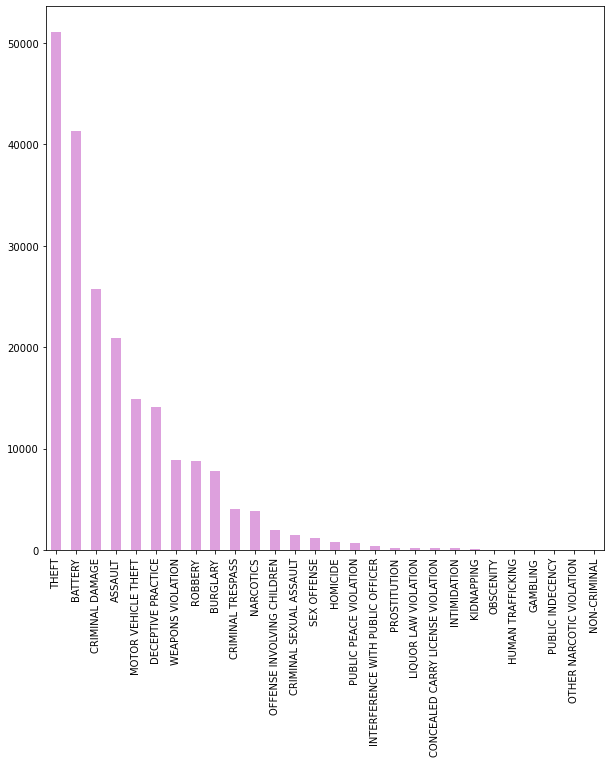

In [19]:
crimes["PRIMARY DESCRIPTION"].value_counts().plot(kind='bar',color='plum')

In [20]:
Top_10_Crimes =  crimes['PRIMARY DESCRIPTION'].value_counts().sort_values(ascending=False).head(10)
print(Top_10_Crimes)

THEFT                  51058
BATTERY                41325
CRIMINAL DAMAGE        25735
ASSAULT                20907
MOTOR VEHICLE THEFT    14846
DECEPTIVE PRACTICE     14068
WEAPONS VIOLATION       8858
ROBBERY                 8763
BURGLARY                7747
CRIMINAL TRESPASS       4078
Name: PRIMARY DESCRIPTION, dtype: int64


### Plotting top 10 crimes

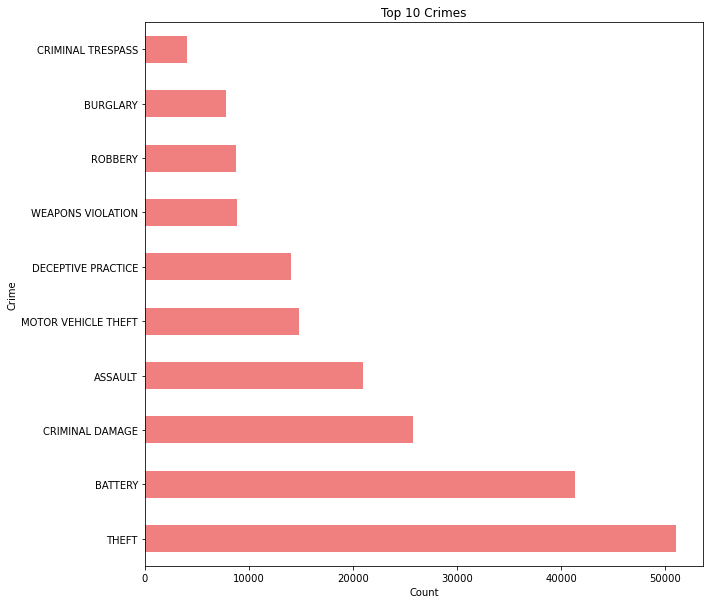

In [21]:
Top10Crimes = crimes.value_counts('PRIMARY DESCRIPTION')[:10].\
    plot(kind = 'barh',\
         title = "Top 10 Crimes", color='lightcoral'
        )

Top10Crimes.set_xlabel("Count")
Top10Crimes.set_ylabel("Crime")
plt.show()

### Arrest unique value counts

<AxesSubplot:>

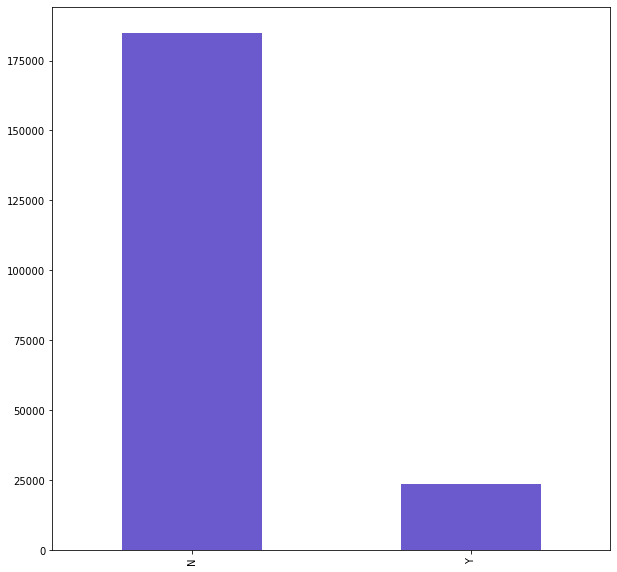

In [22]:
crimes.ARREST.value_counts().plot(kind='bar',color='slateblue')

### People arrested in different crimes

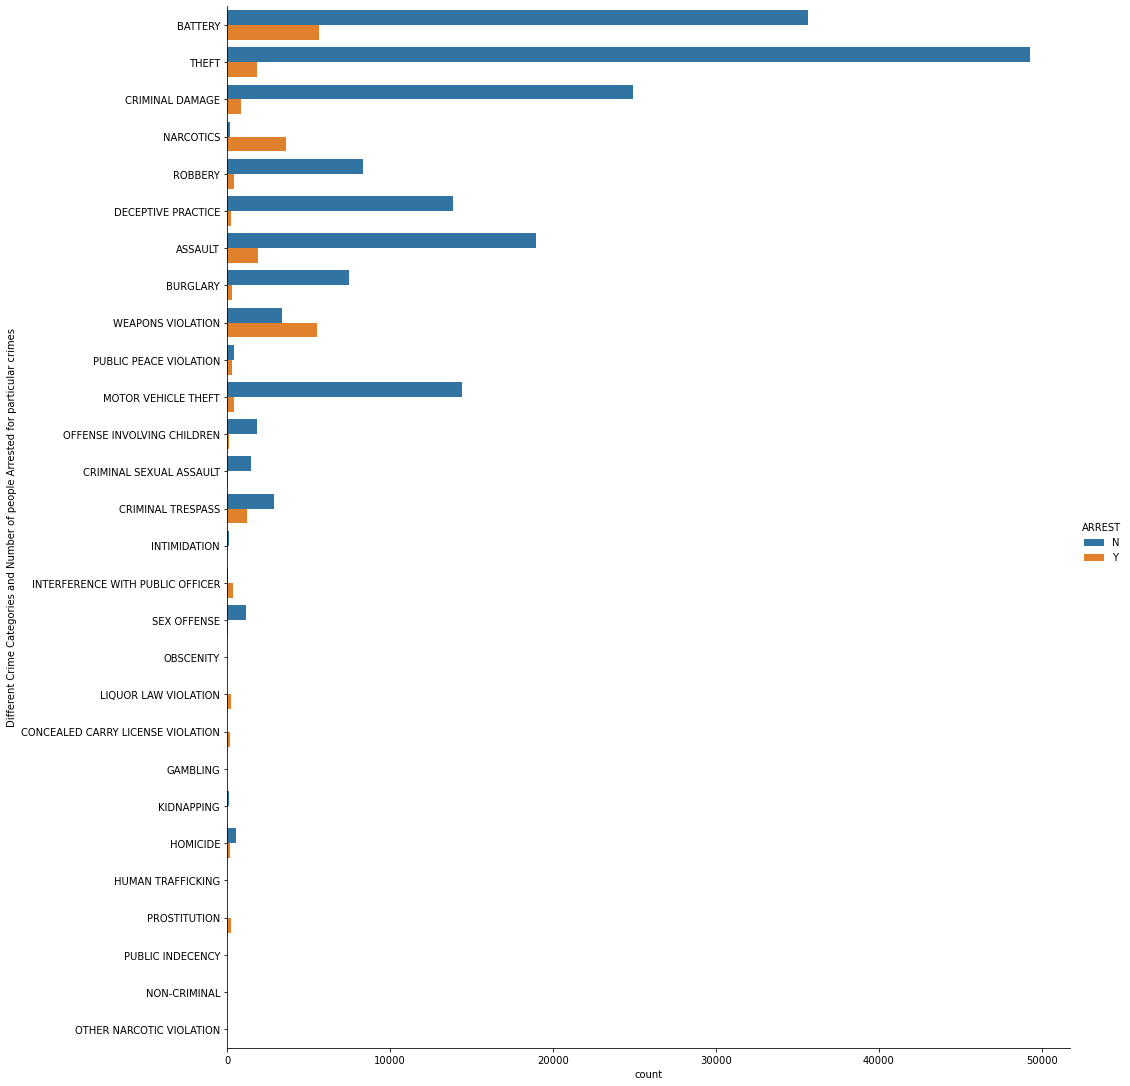

In [23]:
Arrested_Data = sns.factorplot(y="PRIMARY DESCRIPTION", hue="ARREST", kind="count",
                   data=crimes,size=15)
Arrested_Data.set_ylabels("Different Crime Categories and Number of people Arrested for particular crimes") 

### The aggregation of the arrest count

In [24]:
Arrested=crimes.groupby('ARREST')['ARREST'].agg('count').sort_values(ascending=False)
Arrested

ARREST
N    184975
Y     23614
Name: ARREST, dtype: int64

### Distribution of crimes by Accidents occured

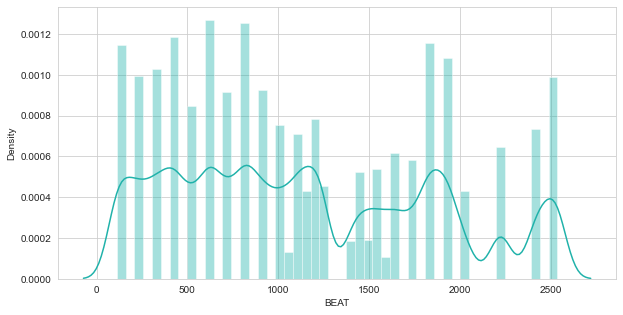

In [25]:
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
sns.distplot(crimes["BEAT"],color='lightseagreen')
plt.show()